In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
da = pd.read_csv(r"D:\Data Science\Technical\Session 21 Material-20250820\Adidas US Sales Datasets.txt", sep='\t')

In [3]:
ds = pd.read_csv(r"D:\Data Science\Technical\Session 21 Material-20250820\retail_store_demographics_extended.csv")

#### 1. Data Profiling ####

In [4]:
da.shape

(9658, 13)

In [5]:
ds.shape

(54, 6)

In [6]:
da.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
ds.head()

,State,City,Population,Median Income,Competitor Count,Average Age
0,New York,New York,570690,52121,48,33.9
1,Texas,Houston,3281380,66099,27,44.5
2,California,San Francisco,3971783,72418,28,34.9
3,California,Los Angeles,3058324,43236,15,43.5
4,Illinois,Chicago,602767,86426,11,34.1


In [8]:
data = pd.merge(ds, da, on=['State', 'City'], how='left')

In [9]:
data.shape

(9658, 17)

In [10]:
data.head()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,01/01/2020,Northeast,Men's Street Footwear,50.0,"1,200",600000.0,300000.0,0.50,In-store
1,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,02/01/2020,Northeast,Men's Athletic Footwear,50.0,"1,000",500000.0,150000.0,0.30,In-store
2,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,03/01/2020,Northeast,Women's Street Footwear,40.0,"1,000",400000.0,140000.0,0.35,In-store
3,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,04/01/2020,Northeast,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,05/01/2020,Northeast,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             9658 non-null   object 
 1   City              9658 non-null   object 
 2   Population        9658 non-null   int64  
 3   Median Income     9658 non-null   int64  
 4   Competitor Count  9658 non-null   int64  
 5   Average Age       9658 non-null   float64
 6   Retailer          9658 non-null   object 
 7   Retailer ID       9658 non-null   int64  
 8   Invoice Date      9658 non-null   object 
 9   Region            9658 non-null   object 
 10  Product           9658 non-null   object 
 11  Price per Unit    9658 non-null   float64
 12  Units Sold        9658 non-null   object 
 13  Total Sales       9658 non-null   float64
 14  Operating Profit  9658 non-null   float64
 15  Operating Margin  9658 non-null   float64
 16  Sales Method      9658 non-null   object 


In [12]:
data.isnull().sum()

State               0
City                0
Population          0
Median Income       0
Competitor Count    0
Average Age         0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(10)

In [14]:
data.describe()

,Population,Median Income,Competitor Count,Average Age,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin
count,9.658000e+03,9658.000000,9658.000000,9658.000000,9.658000e+03,9658.000000,9658.000000,9658.000000,9658.000000
mean,3.875678e+06,64851.405260,32.230379,37.483496,1.173862e+06,45.209671,93198.700559,34398.940457,0.422986
std,2.785908e+06,14199.625793,15.110598,4.086982,2.634950e+04,14.704864,141865.915201,54173.261387,0.097170
min,1.002500e+05,41373.000000,6.000000,30.700000,1.128299e+06,7.000000,0.000000,0.000000,0.100000
25%,1.073565e+06,51230.000000,25.000000,34.400000,1.185732e+06,35.000000,4250.000000,1916.640000,0.350000
50%,3.577371e+06,63976.000000,30.000000,37.000000,1.185732e+06,45.000000,9573.000000,4365.360000,0.410000
75%,6.050973e+06,79178.000000,45.000000,40.900000,1.185732e+06,55.000000,150000.000000,52000.000000,0.490000
max,8.844971e+06,87127.000000,60.000000,44.900000,1.197831e+06,110.000000,825000.000000,390000.000000,0.800000


In [15]:
data.describe(include="O").T

,count,unique,top,freq
State,9658,50,Texas,432
City,9658,52,Portland,360
Retailer,9658,6,Foot Locker,2639
Invoice Date,9658,724,17/01/2021,77
Region,9658,9,West,2418
Product,9658,6,Men's Street Footwear,1612
Units Sold,9658,370,225,208
Sales Method,9658,3,Online,4889


In [16]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

cat_cols = data.select_dtypes(include='object').columns
for c in cat_cols:
    print(f'=={c} has: {data[c].unique()}')
    print('------------------------')

==State has: ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
------------------------
==City has: ['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroit' 'St. Louis'
 'Salt Lake City' 'New Orleans' 'Boise' 'Phoenix' 'Albuquerque' 'Atlanta'
 'Charlesto

#### 2. Data Cleansing ####

In [17]:
data["Units Sold"] = data["Units Sold"].str.replace(",", "")
data["Units Sold"] = pd.to_numeric(data["Units Sold"], errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             9658 non-null   object 
 1   City              9658 non-null   object 
 2   Population        9658 non-null   int64  
 3   Median Income     9658 non-null   int64  
 4   Competitor Count  9658 non-null   int64  
 5   Average Age       9658 non-null   float64
 6   Retailer          9658 non-null   object 
 7   Retailer ID       9658 non-null   int64  
 8   Invoice Date      9658 non-null   object 
 9   Region            9658 non-null   object 
 10  Product           9658 non-null   object 
 11  Price per Unit    9658 non-null   float64
 12  Units Sold        9658 non-null   int64  
 13  Total Sales       9658 non-null   float64
 14  Operating Profit  9658 non-null   float64
 15  Operating Margin  9658 non-null   float64
 16  Sales Method      9658 non-null   object 


In [19]:
data.isnull().sum()

State               0
City                0
Population          0
Median Income       0
Competitor Count    0
Average Age         0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [20]:
data.head()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,01/01/2020,Northeast,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,02/01/2020,Northeast,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,03/01/2020,Northeast,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,04/01/2020,Northeast,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,05/01/2020,Northeast,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [22]:
data.duplicated().sum()

np.int64(10)

In [25]:
data = data.drop_duplicates()

In [26]:
data.shape

(9648, 17)

In [29]:
data.describe()

,Population,Median Income,Competitor Count,Average Age,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,3.874543e+06,64853.477612,32.238806,37.488806,1.173850e+06,45.216625,256.720667,93273.437500,34425.244761,0.422991
std,2.786175e+06,14203.419328,15.113879,4.085545,2.636038e+04,14.705397,214.502882,141916.016727,54193.113713,0.097197
min,1.002500e+05,41373.000000,6.000000,30.700000,1.128299e+06,7.000000,-173.000000,0.000000,0.000000,0.100000
25%,1.073565e+06,51230.000000,25.000000,34.400000,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,3.540875e+06,63976.000000,30.000000,37.000000,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,6.050973e+06,79178.000000,45.000000,40.900000,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,8.844971e+06,87127.000000,60.000000,44.900000,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [31]:
n = (data['Units Sold'] < 0).sum()
n

np.int64(9)

In [35]:
negative_rows = data[data['Units Sold'] < 0]
print(negative_rows[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']])

      Price per Unit  Units Sold  Total Sales  Operating Profit  \
6887            16.0         -99       1584.0            728.64   
8767            37.0        -105       3885.0           1787.10   
8772            45.0        -173       7785.0           3269.70   
8962            33.0         -68       2244.0            762.96   
9415            47.0         -98       4606.0           2256.94   
9585            41.0         -96       3936.0           1298.88   
9619            39.0        -113       4407.0           1542.45   
9637            51.0        -114       5814.0           2034.90   
9646            61.0        -144       8784.0           3513.60   

      Operating Margin  
6887              0.46  
8767              0.46  
8772              0.42  
8962              0.34  
9415              0.49  
9585              0.33  
9619              0.35  
9637              0.35  
9646              0.40  


In [36]:
data.tail()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9651,New Hampshire,Manchester,5702611,61403,8,34.5,Foot Locker,1185732,24/01/2021,Northeast,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9652,New Hampshire,Manchester,5702611,61403,8,34.5,Foot Locker,1185732,24/01/2021,Northeast,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9653,New Hampshire,Manchester,5702611,61403,8,34.5,Foot Locker,1185732,22/02/2021,Northeast,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9654,New Hampshire,Manchester,5702611,61403,8,34.5,Foot Locker,1185732,22/02/2021,Northeast,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9655,New Hampshire,Manchester,5702611,61403,8,34.5,Foot Locker,1185732,22/02/2021,Northeast,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [37]:
data['Units Sold'] = data['Units Sold'].abs()

In [38]:
n = (data['Units Sold'] < 0).sum()
n

np.int64(0)

In [39]:
data.describe()

,Population,Median Income,Competitor Count,Average Age,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,3.874543e+06,64853.477612,32.238806,37.488806,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.786175e+06,14203.419328,15.113879,4.085545,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.002500e+05,41373.000000,6.000000,30.700000,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.073565e+06,51230.000000,25.000000,34.400000,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,3.540875e+06,63976.000000,30.000000,37.000000,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,6.050973e+06,79178.000000,45.000000,40.900000,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,8.844971e+06,87127.000000,60.000000,44.900000,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [41]:
zero = (data['Units Sold'] == 0).sum()
zero

np.int64(4)

In [44]:
zero_rows = data[data['Units Sold'] == 0]
print(zero_rows[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']])

      Price per Unit  Units Sold  Total Sales  Operating Profit  \
2603            35.0           0          0.0               0.0   
2609            30.0           0          0.0               0.0   
2675            33.0           0          0.0               0.0   
2681            27.0           0          0.0               0.0   

      Operating Margin  
2603              0.40  
2609              0.40  
2675              0.55  
2681              0.53  


In [45]:
data['Total Sales'] = data['Price per Unit'] * data ['Units Sold']
data['Operating Profit'] = data['Total Sales'] * data ['Operating Margin']

In [46]:
data.head()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,01/01/2020,Northeast,Men's Street Footwear,50.0,1200,60000.0,30000.0,0.50,In-store
1,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,02/01/2020,Northeast,Men's Athletic Footwear,50.0,1000,50000.0,15000.0,0.30,In-store
2,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,03/01/2020,Northeast,Women's Street Footwear,40.0,1000,40000.0,14000.0,0.35,In-store
3,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,04/01/2020,Northeast,Women's Athletic Footwear,45.0,850,38250.0,13387.5,0.35,In-store
4,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,05/01/2020,Northeast,Men's Apparel,60.0,900,54000.0,16200.0,0.30,In-store


#### 3. Feature Engineering ####

In [53]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], dayfirst=True)

data['sale_day'] = data['Invoice Date'].dt.day
data['sale_month'] = data['Invoice Date'].dt.month
data['sale_year'] = data['Invoice Date'].dt.year
data['sale_day_name'] = data['Invoice Date'].dt.day_name()

In [54]:
data.head()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,...,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,sale_day,sale_month,sale_year,sale_day_name
0,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-01,Northeast,...,50.0,1200,60000.0,30000.0,0.50,In-store,1,1,2020,Wednesday
1,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-02,Northeast,...,50.0,1000,50000.0,15000.0,0.30,In-store,2,1,2020,Thursday
2,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-03,Northeast,...,40.0,1000,40000.0,14000.0,0.35,In-store,3,1,2020,Friday
3,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-04,Northeast,...,45.0,850,38250.0,13387.5,0.35,In-store,4,1,2020,Saturday
4,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-05,Northeast,...,60.0,900,54000.0,16200.0,0.30,In-store,5,1,2020,Sunday


In [59]:
def get_season (month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else :
        return 'Fail'
data['Season'] = data['sale_month'].apply(get_season)

In [60]:
data['Gender'] = data['Product'].str.split().str[0]
data['Gender'] = data['Gender'].str.replace("'s", "", regex=False)

data['Product Name'] = data['Product'].str.split().str[1:].str.join(' ')

In [61]:
data.head()

,State,City,Population,Median Income,Competitor Count,Average Age,Retailer,Retailer ID,Invoice Date,Region,...,Operating Profit,Operating Margin,Sales Method,sale_day,sale_month,sale_year,sale_day_name,Season,Gender,Product Name
0,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-01,Northeast,...,30000.0,0.50,In-store,1,1,2020,Wednesday,Winter,Men,Street Footwear
1,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-02,Northeast,...,15000.0,0.30,In-store,2,1,2020,Thursday,Winter,Men,Athletic Footwear
2,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-03,Northeast,...,14000.0,0.35,In-store,3,1,2020,Friday,Winter,Women,Street Footwear
3,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-04,Northeast,...,13387.5,0.35,In-store,4,1,2020,Saturday,Winter,Women,Athletic Footwear
4,New York,New York,570690,52121,48,33.9,Foot Locker,1185732,2020-01-05,Northeast,...,16200.0,0.30,In-store,5,1,2020,Sunday,Winter,Men,Apparel


#### 4. Data Visualization ####

#### Uni-Variate ####

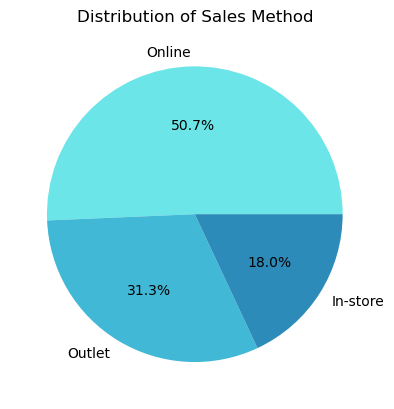

In [129]:
Sales_Method = data['Sales Method'].value_counts()
colors = ['#6ce5e8', '#41b8d5', '#2d8bba']
plt.pie(Sales_Method, labels=Sales_Method.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Sales Method")
plt.show()

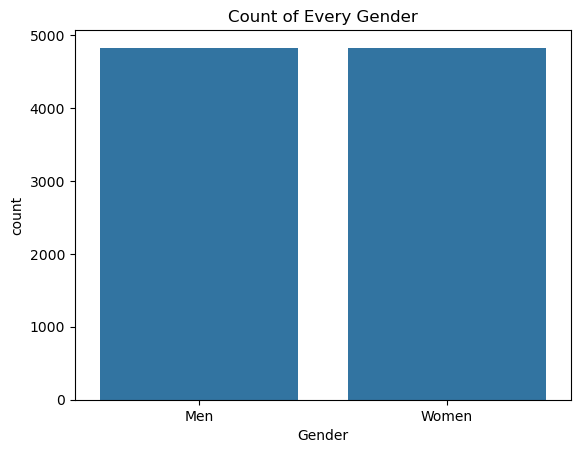

In [71]:
sns.countplot(data=data, x='Gender', order=data['Gender'].value_counts().index)
plt.title("Count of Every Gender")
plt.show()

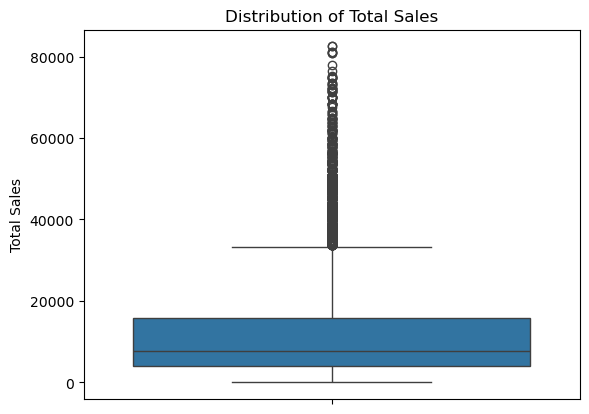

In [86]:
sns.boxplot(data=data, y='Total Sales')
plt.title("Distribution of Total Sales")
plt.show()

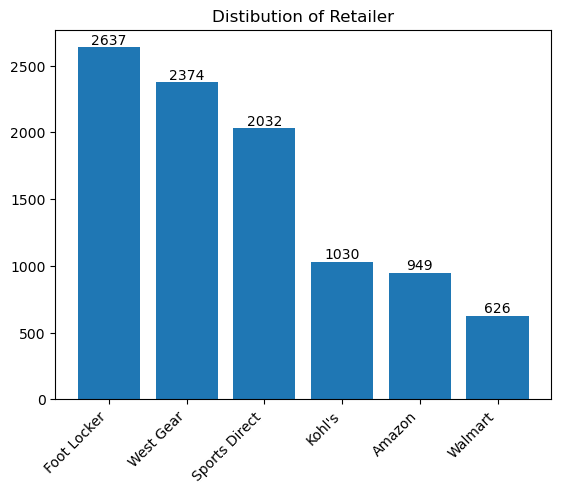

In [85]:
Retailer=data['Retailer'].value_counts()
bars = plt.bar(Retailer.index, Retailer.values)
for b in bars:
    h= b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h+1, str(h), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right') 
plt.title("Distibution of Retailer")
plt.show()

#### Bi-Variate ####

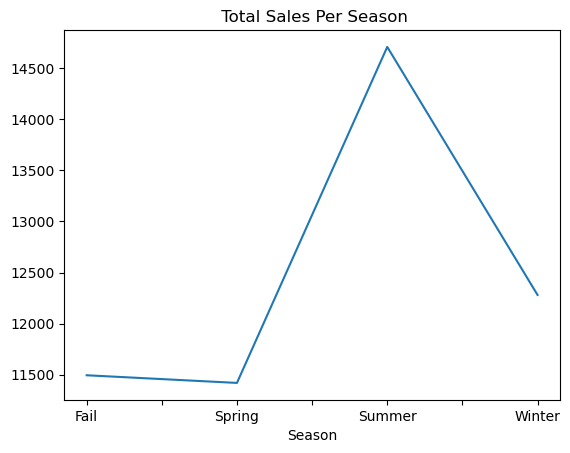

In [103]:
data.groupby('Season')['Total Sales'].mean().plot(kind='line')
plt.title(" Total Sales Per Season")
plt.show()  ##Summer

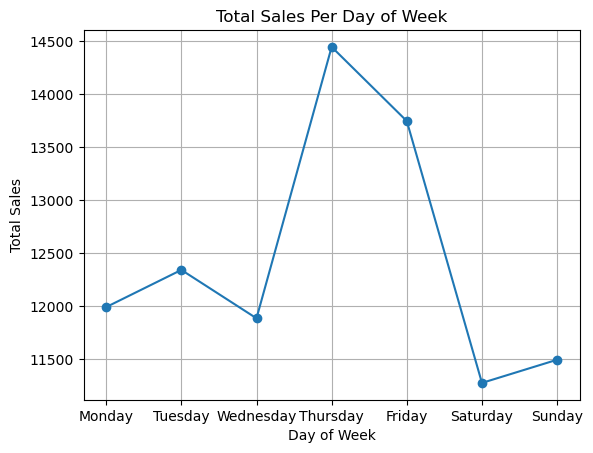

In [104]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_day = data.groupby('sale_day_name')['Total Sales'].mean()
sales_per_day = sales_per_day.reindex(day_order)

sales_per_day.plot(kind='line', marker='o')
plt.title("Total Sales Per Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

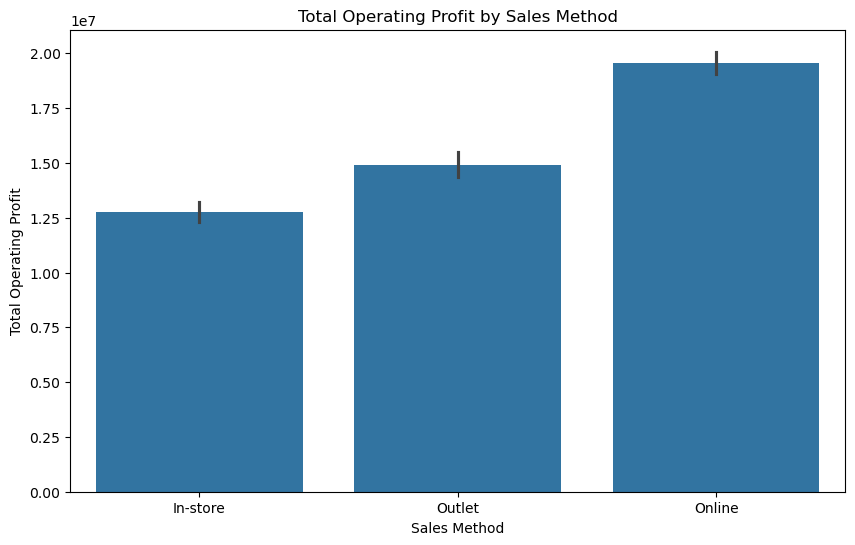

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Sales Method'], y=data['Operating Profit'], estimator='sum')
plt.title('Total Operating Profit by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Operating Profit')
plt.show()  ##online

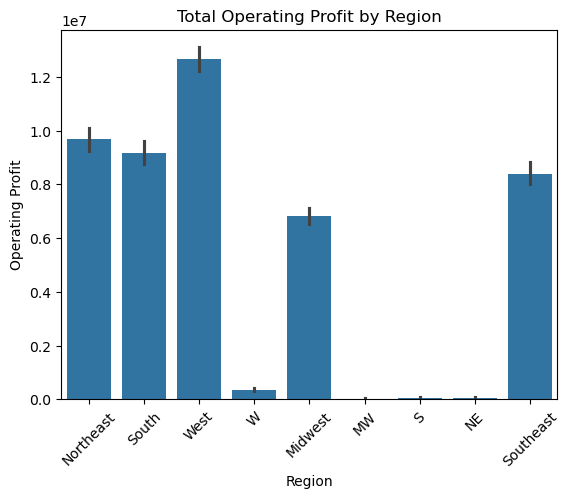

In [108]:
sns.barplot(x='Region', y='Operating Profit', data=data, estimator='sum')
plt.title('Total Operating Profit by Region')
plt.xticks(rotation=45)
plt.show()

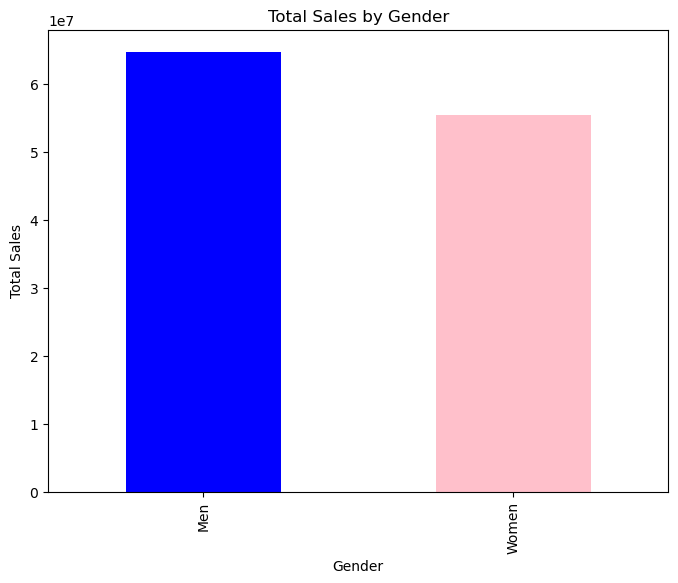

In [110]:
plt.figure(figsize=(8, 6))
sales_by_gender = data.groupby('Gender')['Total Sales'].sum()
sales_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

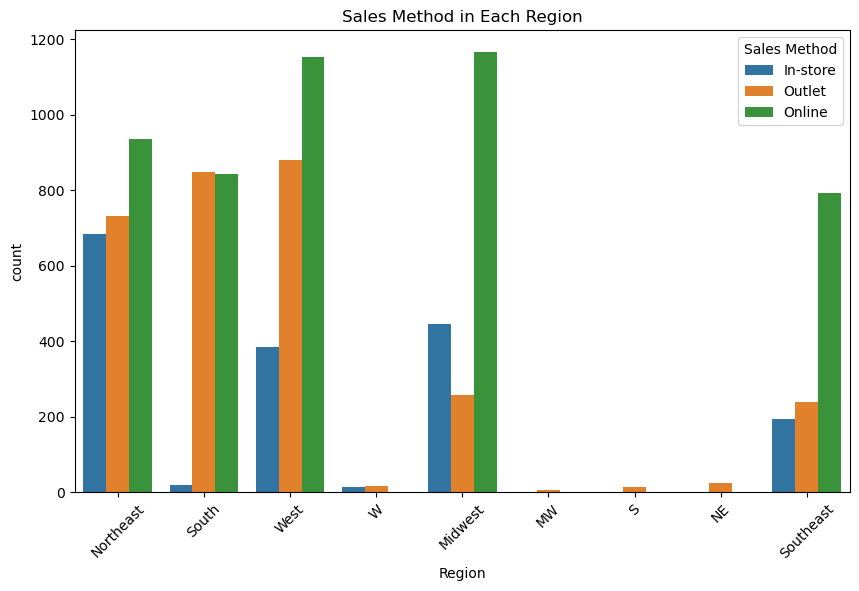

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='Sales Method')
plt.title('Sales Method in Each Region')
plt.xticks(rotation=45)
plt.show()

#### Multi-Variate ####

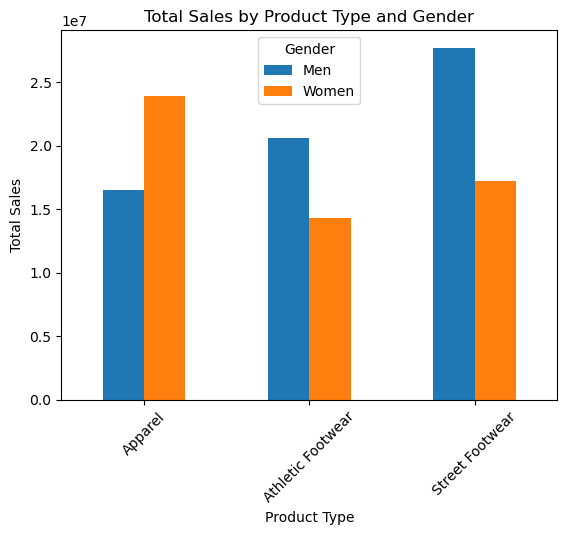

In [115]:
pivot = data.pivot_table(values='Total Sales', 
                         index='Product Name', 
                         columns='Gender', 
                         aggfunc='sum')


pivot.plot(kind='bar')
plt.title('Total Sales by Product Type and Gender')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


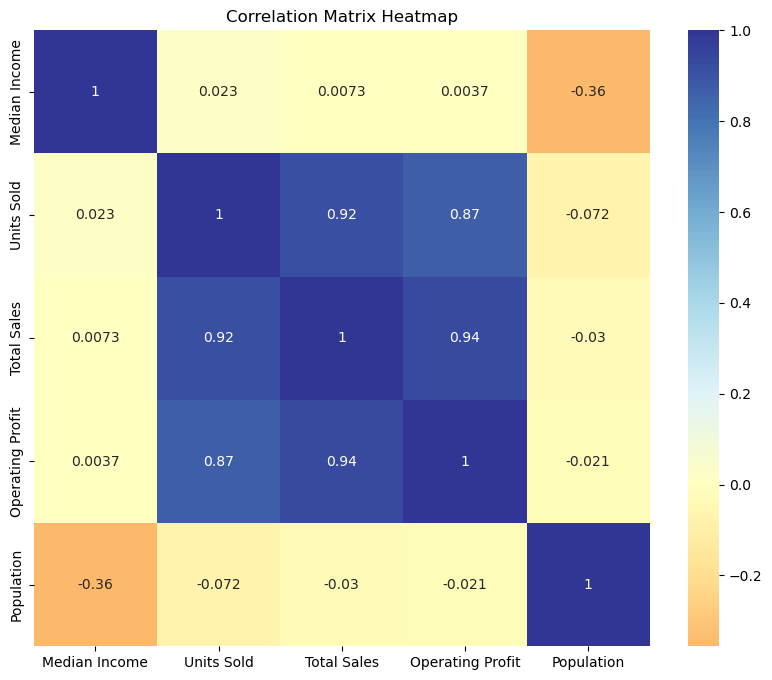

In [138]:
numeric_data = data[['Median Income', 'Units Sold', 'Total Sales', 'Operating Profit', 'Population']]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,   
            cmap='RdYlBu', 
            center=0,     
            square=True)  

plt.title('Correlation Matrix Heatmap')
plt.show()

#### 5. Insights ####

1. Season: Sales are higher in the summer season.
2. Day: Sales are higher on Friday.
3. Region: The northern region has the highest sales.
4. Type: Men prefer Street Footwear, and women prefer Apparel.
5. Selling Method: Online sales are the most profitable.

#### 5. Recommendations ####

1. Increase stock in the summer season.
2. Offer more products on Friday
3. Support online payment methods in remote areas.
4. Increase Street Footwear products for men.
5. Increase Apparel products for women.